In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# Loading train and test data

train1 = pd.read_csv("../Dataset/train.csv") 
test1 = pd.read_csv("../Dataset/test.csv") 

In [3]:
# Checking number of rows and columns

print(train1.shape)
print(test1.shape)

(76020, 371)
(75818, 370)


In [4]:
# Analysing some basic Statistics

train1.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# Checking NAN values

print(train1.isnull().values.sum())
print(test1.isnull().values.sum())

0
0


In [6]:
#Checking data balance according to target variable

Positive = train1[train1["TARGET"] == 1]
print(Positive.shape)
Negative = train1[train1["TARGET"] == 0]
print(Negative.shape)

(3008, 371)
(73012, 371)


In [7]:
# Balancing data

train2 = train1[train1["TARGET"] == 0].sample(3008).append(train1[train1["TARGET"] == 1])
Positive = train2[train2["TARGET"] == 1]
print(Positive.shape)
Negative = train2[train2["TARGET"] == 0]
print(Negative.shape)

(3008, 371)
(3008, 371)


In [8]:
# Removing variables with std = 0

train3 = train2.loc[:,train2.std(axis = 0) != 0]
test3 = test1.loc[:,train2.std(axis = 0) != 0]
train3.shape

(6016, 267)

In [9]:
# Creating a variable to count the number of zeros for each ID

train4 = train3
test4 = test3
train4["Zeros"] = train3.drop("TARGET", 1).apply(lambda x: sum(x == 0), 1)
test4["Zeros"] = test3.apply(lambda x: sum(x == 0), 1)
    

/home/gc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/gc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Applying PCA to the low correlation variables

train_corr = train4.corr(method = 'pearson')["TARGET"]
train_corr = train_corr.fillna(0)
trainPCA = train4
testPCA = test4
trainPCA = trainPCA.drop("TARGET",1)

# Applying PCA

pca = PCA(n_components=6)
trainPCA = pd.DataFrame(pca.fit_transform(trainPCA))
testPCA = pd.DataFrame(pca.fit_transform(testPCA))

trainPCA.columns = ["PCA0","PCA1","PCA2","PCA3", "PCA4", "PCA5"]
testPCA.columns = ["PCA0","PCA1","PCA2","PCA3", "PCA4", "PCA5"]

trainPCA["TARGET"] = train4.TARGET.values

print("The PCA explained variance ratio is: " + str(sum(pca.explained_variance_ratio_)*1))

The PCA explained variance ratio is: 0.9833794424635177


In [16]:
trainPCA

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,TARGET
0,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444166e+06,1.059180e+06,-474147.628661,0
1,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444166e+06,1.059182e+06,-474147.641088,0
2,-4.802055e+07,-2.104746e+07,-1.152292e+07,-7.444167e+06,1.059187e+06,-474147.742973,0
3,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444166e+06,1.059182e+06,-474147.575352,0
4,-4.802055e+07,-2.104746e+07,-1.152292e+07,-7.444167e+06,1.059185e+06,-474147.691574,0
...,...,...,...,...,...,...,...
6011,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444166e+06,1.059179e+06,-474147.697623,1
6012,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444167e+06,1.059184e+06,-474147.823139,1
6013,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444166e+06,1.059180e+06,-474147.718939,1
6014,-4.802055e+07,-2.104746e+07,-1.152291e+07,-7.444166e+06,1.059182e+06,-474147.766943,1


In [19]:
# Removing outliers

trainPCA2 = trainPCA[(np.abs(stats.zscore(trainPCA)) < 3).all(axis=1)]

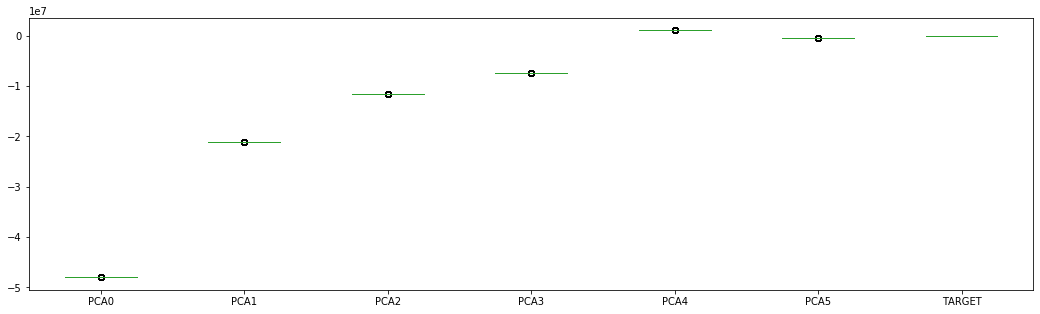

In [20]:
# Making boxplot

trainPCA2.boxplot(grid = False, figsize = (18,5))

In [21]:
# Normalizing Data

scaler = MinMaxScaler(feature_range = (0, 1))
trainPCA3 = trainPCA2.drop(["TARGET"], 1)
trainPCA3 = pd.DataFrame(scaler.fit_transform(trainPCA3), columns=trainPCA3.columns)
trainPCA3["TARGET"] = trainPCA2.TARGET.values
testPCA3 = pd.DataFrame(scaler.fit_transform(testPCA), columns=testPCA.columns)

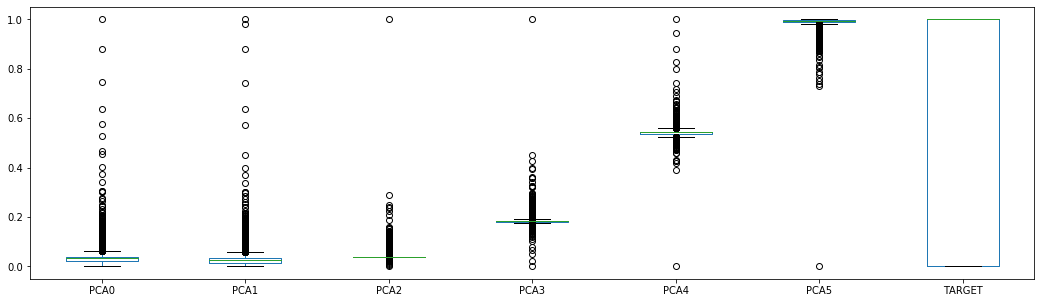

In [22]:
# Making boxplot

trainPCA3.boxplot(grid = False, figsize = (18,5))

In [24]:
# Saving data

trainPCA3.to_csv("../Dataset/train_1.csv")
testPCA3.to_csv("../Dataset/test_1.csv")